Linear Regression

Import Library

In [1]:
import warnings

In [2]:
warnings.simplefilter('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt

In [4]:
%matplotlib inline

Importing Dataset

In [5]:
bfile=pd.read_csv("C:/Users/ADMIN/Downloads/bodyfat (1).csv")

In [6]:
bfile

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


Viewing Shape and information of Dataset

In [7]:
bfile.shape

(252, 15)

In [8]:
bfile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


Dropping the unwanted columns

In [9]:
drop=bfile.drop(['Density','Weight','Height','Neck','Chest','Abdomen','Hip','Thigh','Knee','Ankle','Biceps','Forearm','Wrist'],axis=1)

In [10]:
drop

,BodyFat,Age
0,12.3,23
1,6.1,22
2,25.3,22
3,10.4,26
4,28.7,24
...,...,...
247,11.0,70
248,33.6,72
249,29.3,72
250,26.0,72


Converting DataFrame to Array values

In [11]:
x=drop.iloc[:,0].values.reshape(-1,1)

In [12]:
x

array([[12.3],
       [ 6.1],
       [25.3],
       [10.4],
       [28.7],
       [20.9],
       [19.2],
       [12.4],
       [ 4.1],
       [11.7],
       [ 7.1],
       [ 7.8],
       [20.8],
       [21.2],
       [22.1],
       [20.9],
       [29. ],
       [22.9],
       [16. ],
       [16.5],
       [19.1],
       [15.2],
       [15.6],
       [17.7],
       [14. ],
       [ 3.7],
       [ 7.9],
       [22.9],
       [ 3.7],
       [ 8.8],
       [11.9],
       [ 5.7],
       [11.8],
       [21.3],
       [32.3],
       [40.1],
       [24.2],
       [28.4],
       [35.2],
       [32.6],
       [34.5],
       [32.9],
       [31.6],
       [32. ],
       [ 7.7],
       [13.9],
       [10.8],
       [ 5.6],
       [13.6],
       [ 4. ],
       [10.2],
       [ 6.6],
       [ 8. ],
       [ 6.3],
       [ 3.9],
       [22.6],
       [20.4],
       [28. ],
       [31.5],
       [24.6],
       [26.1],
       [29.8],
       [30.7],
       [25.8],
       [32.3],
       [30. ],
       [21

In [13]:
y=drop.iloc[:,1].values.reshape(-1,1)

In [14]:
y

array([[23],
       [22],
       [22],
       [26],
       [24],
       [24],
       [26],
       [25],
       [25],
       [23],
       [26],
       [27],
       [32],
       [30],
       [35],
       [35],
       [34],
       [32],
       [28],
       [33],
       [28],
       [28],
       [31],
       [32],
       [28],
       [27],
       [34],
       [31],
       [27],
       [29],
       [32],
       [29],
       [27],
       [41],
       [41],
       [49],
       [40],
       [50],
       [46],
       [50],
       [45],
       [44],
       [48],
       [41],
       [39],
       [43],
       [40],
       [39],
       [45],
       [47],
       [47],
       [40],
       [51],
       [49],
       [42],
       [54],
       [58],
       [62],
       [54],
       [61],
       [62],
       [56],
       [54],
       [61],
       [57],
       [55],
       [54],
       [55],
       [54],
       [55],
       [62],
       [55],
       [56],
       [55],
       [61],
       [61],
       [57],

Data visualization before predict

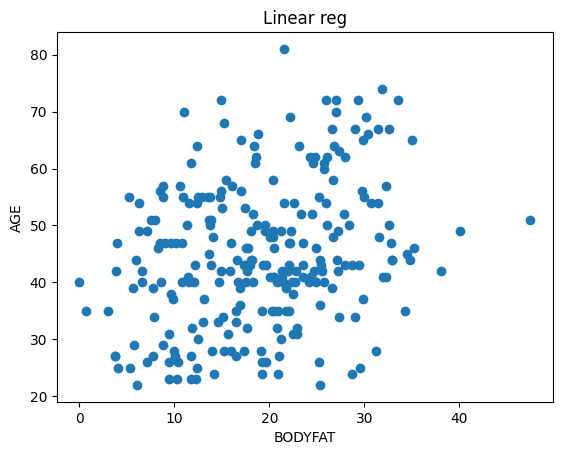

In [15]:
pt.scatter(x,y)
pt.xlabel('BODYFAT')
pt.ylabel('AGE')
pt.title('Linear reg')
pt.show()

Import library 

In [16]:
from sklearn.model_selection import train_test_split

Splitting Dataset

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=0)

In [18]:
x_train.shape

(201, 1)

In [19]:
x_test.shape

(51, 1)

Importing and applying Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr=LinearRegression()

Recognize the value of regression

In [22]:
lr.fit(x_train,y_train)

LinearRegression()

Predicted Values

In [23]:
yy=lr.predict(x_test)

In [24]:
yy

array([[42.50907797],
       [48.36753878],
       [38.67077606],
       [45.70092903],
       [41.25657945],
       [46.99383073],
       [47.88270065],
       [47.64028158],
       [47.88270065],
       [48.40794196],
       [47.64028158],
       [43.68077013],
       [46.10496081],
       [45.74133221],
       [44.12520509],
       [42.91310975],
       [44.16560827],
       [37.74150296],
       [41.49899852],
       [42.02423983],
       [45.70092903],
       [43.07472246],
       [49.53923094],
       [46.50899259],
       [45.41810679],
       [50.3472945 ],
       [39.11521102],
       [46.58979895],
       [46.34737988],
       [48.93318327],
       [49.66044048],
       [48.44834514],
       [48.77157056],
       [42.10504619],
       [51.31697078],
       [43.195932  ],
       [46.99383073],
       [45.90294492],
       [43.76157649],
       [42.06464301],
       [44.52923687],
       [45.86254174],
       [51.51898667],
       [46.54939577],
       [45.74133221],
       [43

In [25]:
yy.shape

(51, 1)

Creating DataFrame for predicted values

In [26]:
dataframe=pd.DataFrame(x_test,columns=['BODYFAT'])

In [27]:
dataframe

,BODYFAT
0,12.5
1,27.0
2,3.0
3,20.4
4,9.4
5,23.6
6,25.8
7,25.2
8,25.8
9,27.1


In [28]:
dataframe['PREDICTED']=yy

In [29]:
dataframe

,BODYFAT,PREDICTED
0,12.5,42.509078
1,27.0,48.367539
2,3.0,38.670776
3,20.4,45.700929
4,9.4,41.256579
5,23.6,46.993831
6,25.8,47.882701
7,25.2,47.640282
8,25.8,47.882701
9,27.1,48.407942


Data visualization after Prediction 

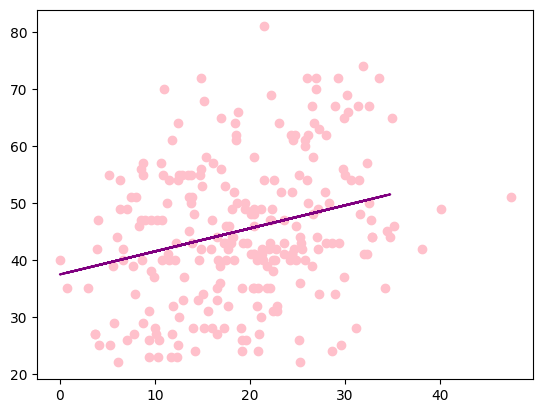

In [34]:
pt.scatter(x,y,color='pink')
pt.plot(x_test,yy,color="purple")
pt.show()

In [35]:
dataframe.to_csv("D:/vac/Predicteddataset.csv")

In [36]:
dataframe

,BODYFAT,PREDICTED
0,12.5,42.509078
1,27.0,48.367539
2,3.0,38.670776
3,20.4,45.700929
4,9.4,41.256579
5,23.6,46.993831
6,25.8,47.882701
7,25.2,47.640282
8,25.8,47.882701
9,27.1,48.407942
